## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

## Importing the Dataset

In [2]:
df = pd.read_csv('D:/uploadable notebooks/sugarcanedataset.csv')

In [3]:
df.head()

,pH,EC,OC,N,P,K,S,Fe,Mn,Zn,pH suit,EC suit,pH & EC,NPK,"pH, EC, NPK"
0,7.51,0.28,0.22,80.16,17.00,197.98,9.8,7.54,4.99,1.85,1,1,1,0,0
1,7.29,0.34,0.64,178.00,6.80,81.30,17.4,17.70,3.48,0.94,1,1,1,1,1
2,7.29,0.34,0.64,74.90,27.53,329.15,17.4,17.70,3.48,0.94,1,1,1,0,0
3,7.34,0.41,0.57,115.38,24.70,283.40,22.8,14.90,3.98,1.26,1,1,1,0,0
4,7.53,0.29,0.61,95.14,17.00,291.09,20.4,14.10,2.06,1.35,1,1,1,0,0


## Checking correlation between attributes

<AxesSubplot:>

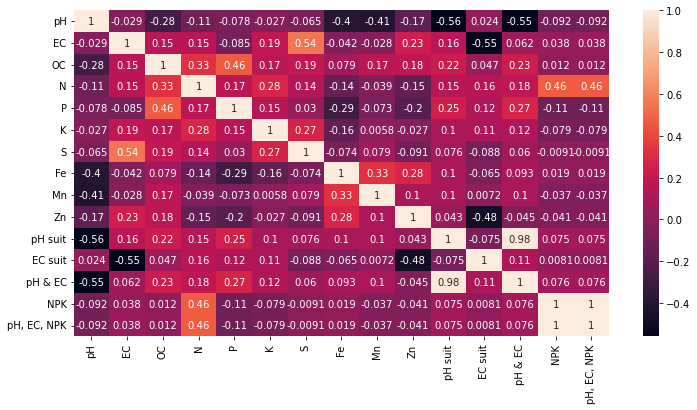

In [9]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.color_palette("cubehelix", as_cmap=True)
sns.heatmap(df.corr(),annot=True)

In [21]:
def distplots(col):
    sns.distplot(df[col],kde=False,bins=40,color='blue')

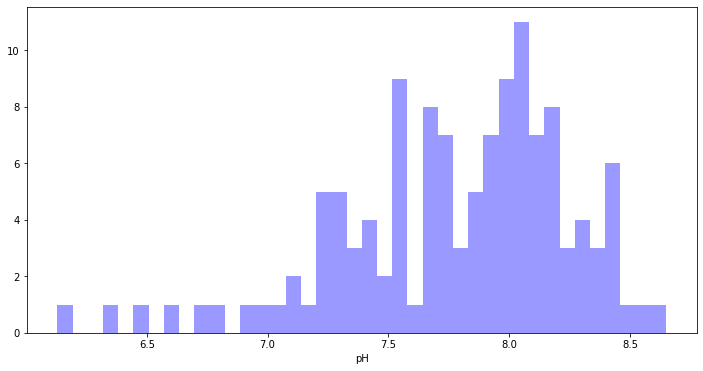

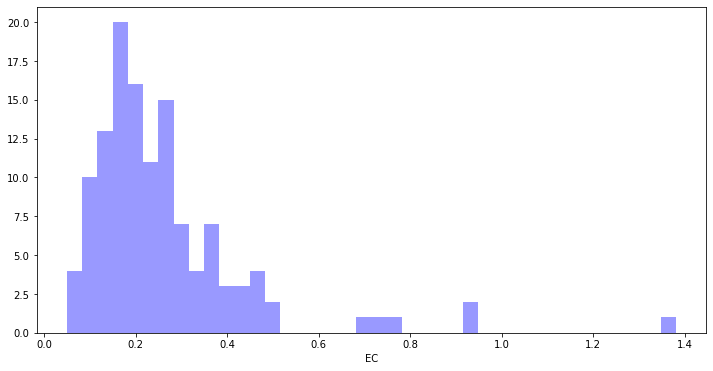

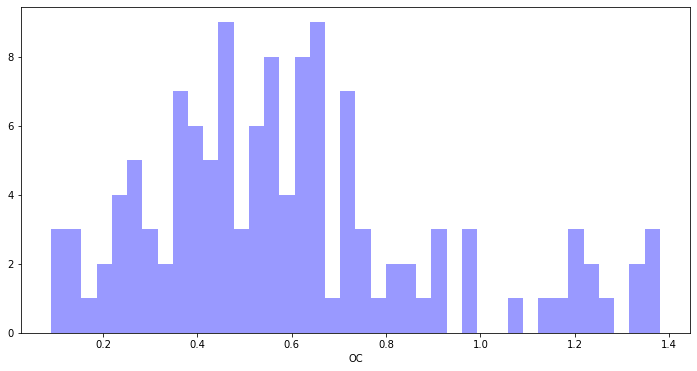

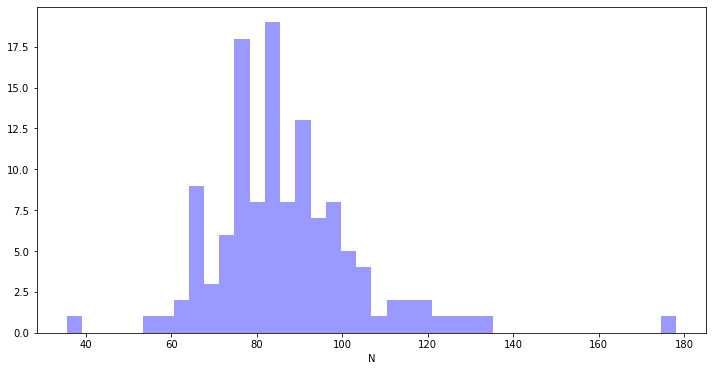

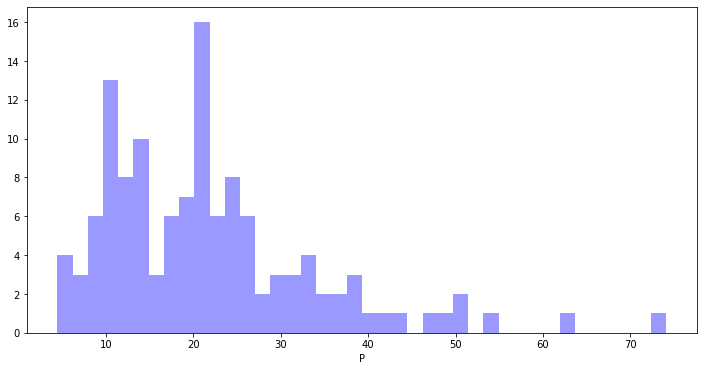

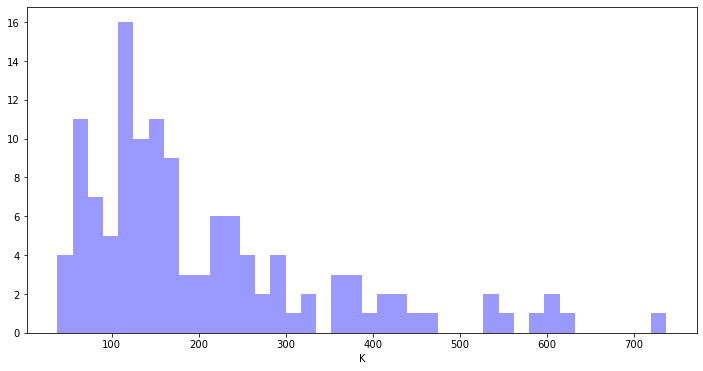

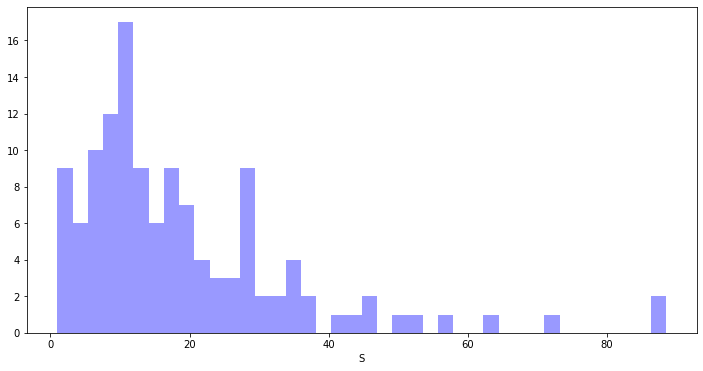

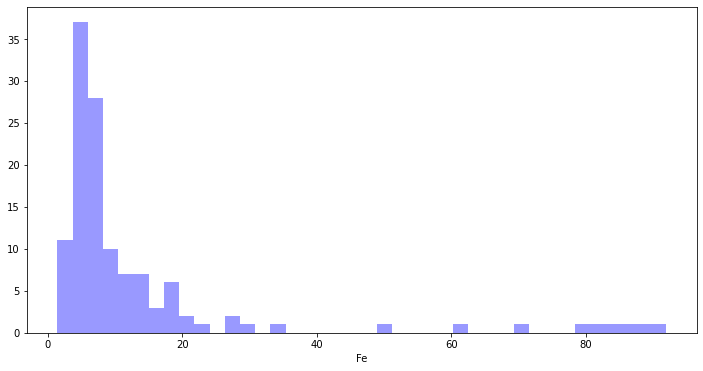

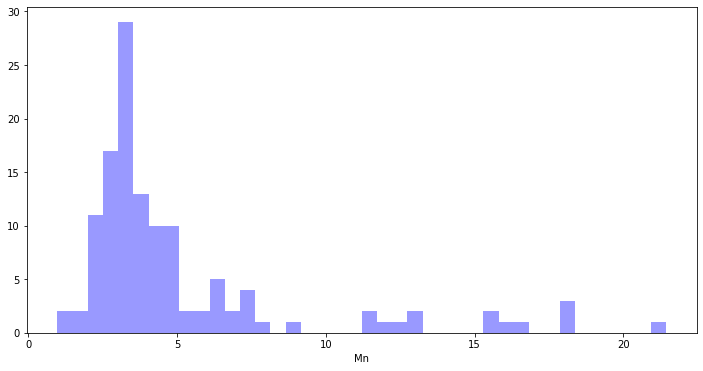

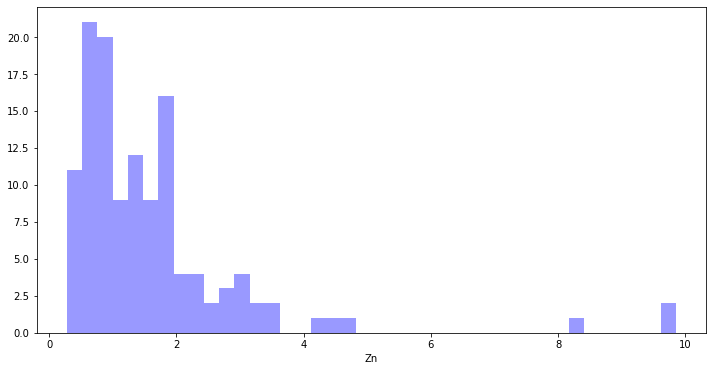

In [22]:
for col in df.iloc[:,:10].columns:
    distplots(col)
    plt.show()

In [31]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8,4)
def countplots(col):
    sns.countplot(df[col])

C:\Users\Arka Lodh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


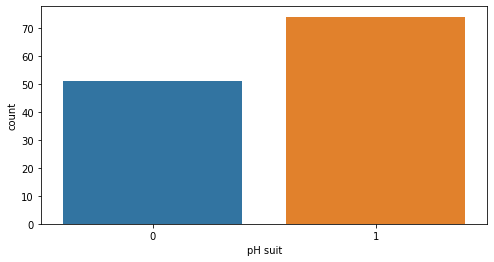

C:\Users\Arka Lodh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


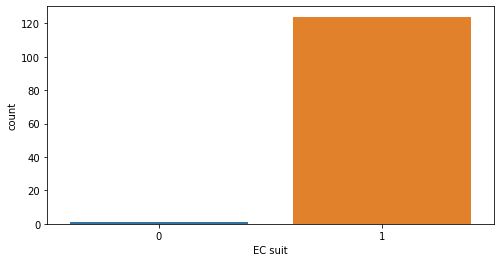

C:\Users\Arka Lodh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


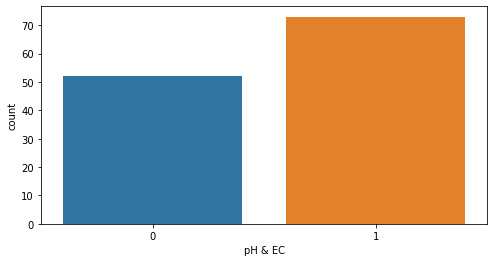

C:\Users\Arka Lodh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


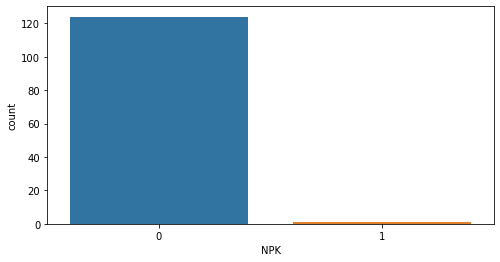

C:\Users\Arka Lodh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


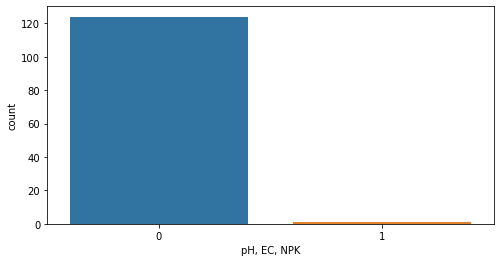

In [32]:
for col in df.iloc[:,10:].columns:
    countplots(col)
    plt.show()

<AxesSubplot:>

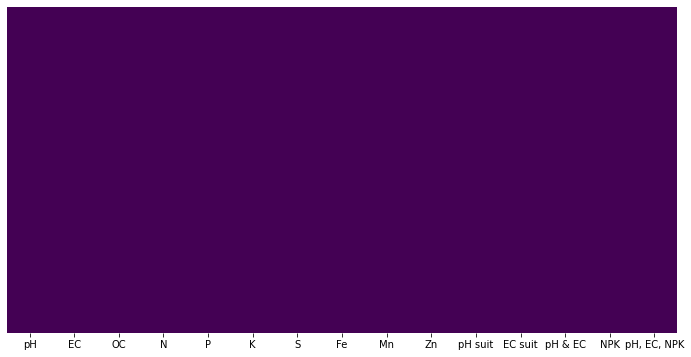

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Dropping the pH column as it almost has na correlation to the pH suit 

In [ ]:
df.drop(['pH'],axis=1,inplace=True)

In [ ]:
df.head()

In [ ]:
df.columns

## Dividing into dependent and independent columns

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

## Dividing into training and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training Random Forest Classifier Model

In [ ]:
classifier = RandomForestClassifier(criterion = 'entropy',random_state = 0,n_estimators = 100)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

## Training Kernel SVM Model

In [ ]:
classifier2 = SVC(kernel = 'rbf', random_state = 0)
classifier2.fit(X_train, y_train)

In [ ]:
y_pred2 = classifier.predict(X_test)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
print(confusion_matrix(y_test, y_pred2))
accuracy_score(y_test, y_pred2)

 We are getting 100% accuracy on both Kernel SVM and Random Forest Models